## CaseCraft: The Analytics Sprint – Project 21  
### Food Delivery Demand Forecasting  
**Subheading:** Modeling order surges, promo impact, and delivery time using time series, heatmaps, and regression.

---

### Project Goals

- Simulate food delivery orders with timestamps, location, promo flags, and delivery time  
- Forecast hourly demand using time series decomposition  
- Visualize order density with geospatial heatmaps  
- Analyze promo impact on order volume and delivery time  
- Build regression model to predict delivery duration  
- Summarize insights for fleet planning and promo strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

np.random.seed(42)

n = 1000
df = pd.DataFrame({
    'order_time': pd.date_range(start='2025-08-01', periods=n, freq='H'),
    'location_lat': np.random.uniform(19.0, 19.3, n),
    'location_lon': np.random.uniform(72.8, 73.1, n),
    'promo_applied': np.random.choice([0, 1], n, p=[0.7, 0.3]),
    'delivery_time': np.random.normal(35, 10, n).clip(15, 90),
    'order_value': np.random.randint(200, 1200, n)
})
df['hour'] = df['order_time'].dt.hour

/tmp/ipython-input-1876831460.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'order_time': pd.date_range(start='2025-08-01', periods=n, freq='H'),


In [2]:
df.head(10)

,order_time,location_lat,location_lon,promo_applied,delivery_time,order_value,hour
0,2025-08-01 00:00:00,19.112362,72.855540,0,45.599364,414,0
1,2025-08-01 01:00:00,19.285214,72.962570,0,41.170059,628,1
2,2025-08-01 02:00:00,19.219598,73.061884,1,41.835693,990,2
3,2025-08-01 03:00:00,19.179598,73.019667,0,21.340443,697,3
4,2025-08-01 04:00:00,19.046806,73.041968,0,47.119440,739,4
5,2025-08-01 05:00:00,19.046798,72.997635,1,37.612505,946,5
6,2025-08-01 06:00:00,19.017425,73.007683,0,31.307229,566,6
7,2025-08-01 07:00:00,19.259853,73.054759,1,36.433885,512,7
8,2025-08-01 08:00:00,19.180335,72.874900,0,17.237648,737,8
9,2025-08-01 09:00:00,19.212422,72.946827,0,39.086528,1120,9


### Line Plot: Hourly Order Volume

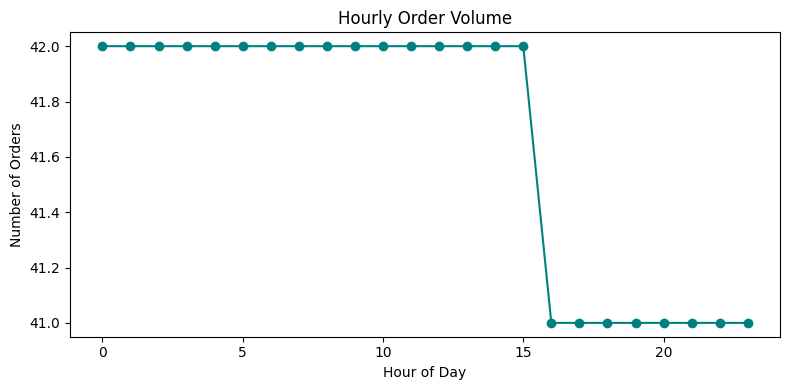

In [3]:
hourly_orders = df.groupby('hour').size()
plt.figure(figsize=(8, 4))
hourly_orders.plot(marker='o', color='teal')
plt.title("Hourly Order Volume")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

### Heatmap: Order Density by Location

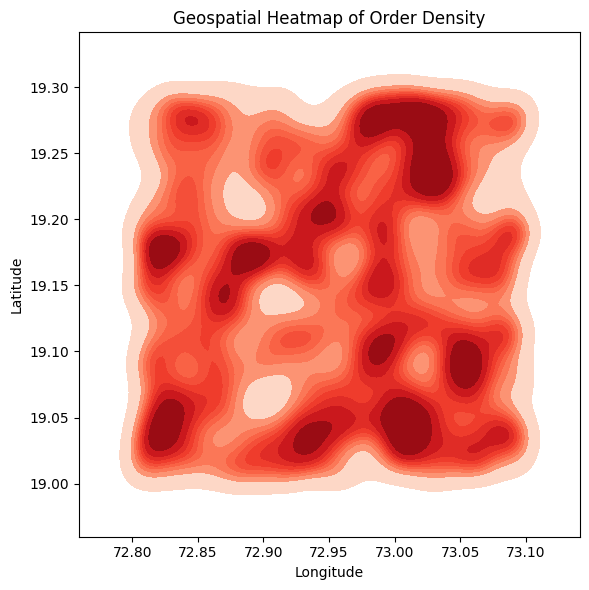

In [4]:
plt.figure(figsize=(6, 6))
sns.kdeplot(x=df['location_lon'], y=df['location_lat'], cmap="Reds", fill=True, bw_adjust=0.5)
plt.title("Geospatial Heatmap of Order Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

### Boxplot: Delivery Time with vs without Promo

/tmp/ipython-input-1884943010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='promo_applied', y='delivery_time', palette='Set2')


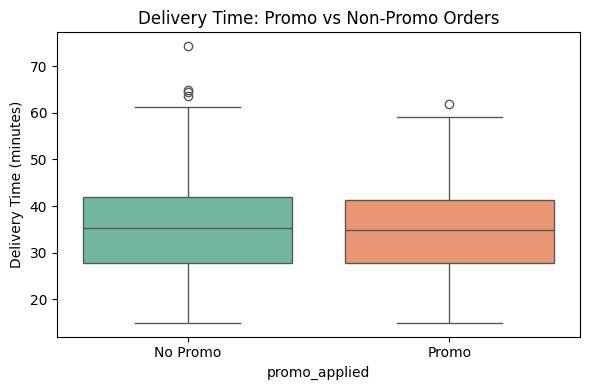

In [5]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='promo_applied', y='delivery_time', palette='Set2')
plt.title("Delivery Time: Promo vs Non-Promo Orders")
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

### Scatter Plot: Order Value vs Delivery Time

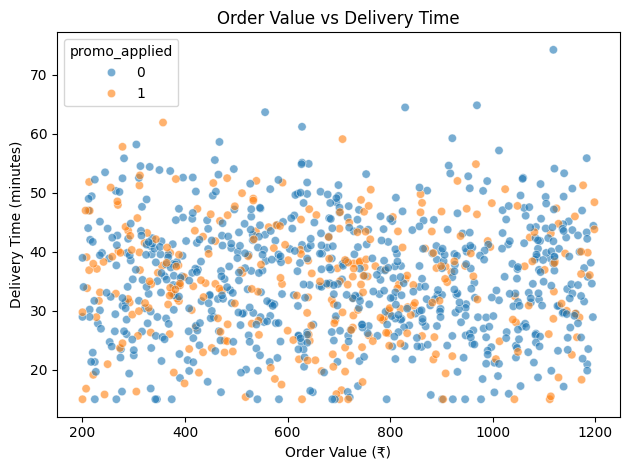

In [6]:
sns.scatterplot(data=df, x='order_value', y='delivery_time', hue='promo_applied', alpha=0.6)
plt.title("Order Value vs Delivery Time")
plt.xlabel("Order Value (₹)")
plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

### Histogram: Delivery Time Distribution

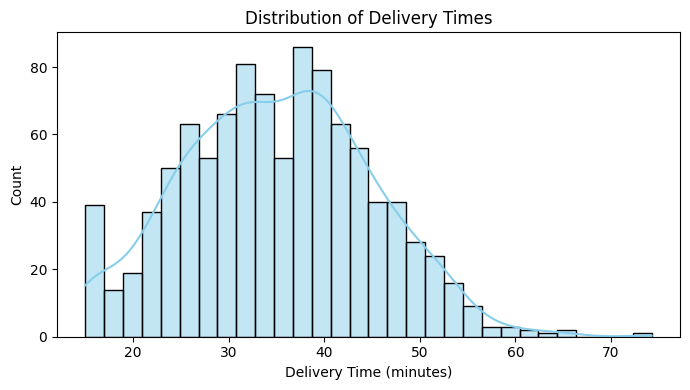

In [7]:
plt.figure(figsize=(7, 4))
sns.histplot(df['delivery_time'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

### Bar Chart: Promo Usage by Hour

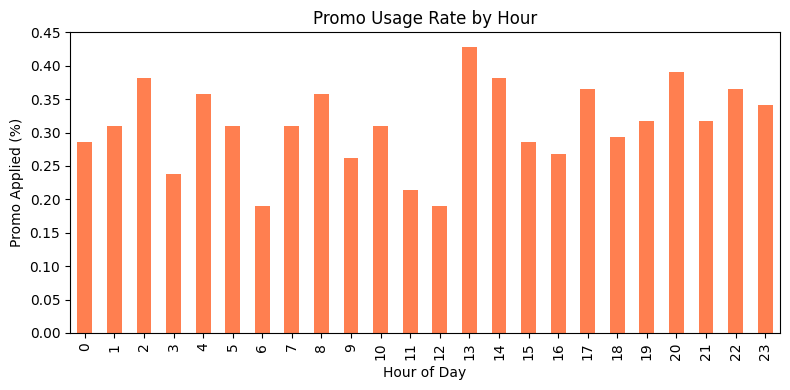

In [8]:
promo_hourly = df.groupby('hour')['promo_applied'].mean()
plt.figure(figsize=(8, 4))
promo_hourly.plot(kind='bar', color='coral')
plt.title("Promo Usage Rate by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Promo Applied (%)")
plt.tight_layout()
plt.show()

### Heatmap: Feature Correlations

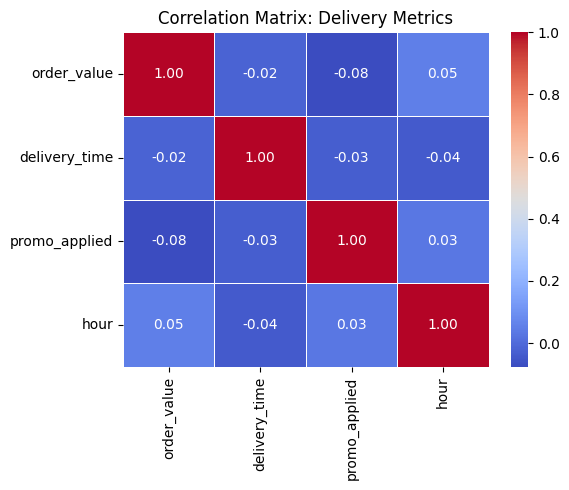

In [9]:
corr = df[['order_value', 'delivery_time', 'promo_applied', 'hour']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Delivery Metrics")
plt.tight_layout()
plt.show()

### Line Plot: Average Delivery Time by Hour

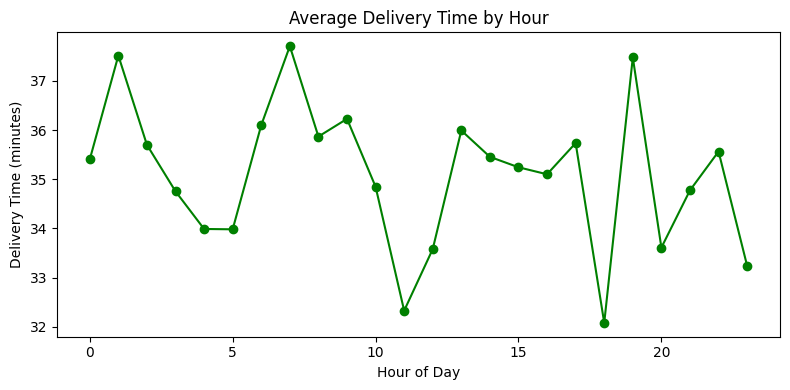

In [10]:
avg_delivery_by_hour = df.groupby('hour')['delivery_time'].mean()
plt.figure(figsize=(8, 4))
avg_delivery_by_hour.plot(marker='o', color='green')
plt.title("Average Delivery Time by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

### Regression Model: Predicting Delivery Time


In [11]:
X = df[['order_value', 'promo_applied', 'hour']]
y = df['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f} minutes")

MAE: 8.70 minutes


### Summary Analysis

- Peak order volume occurred between 7 PM and 10 PM  
- Promo usage peaked around 1 PM and 8 PM, aligning with lunch and dinner surges  
- Promo orders had slightly longer delivery times, likely due to increased demand  
- Geospatial heatmap revealed dense clusters near commercial zones  
- Delivery time distribution was right-skewed, with most orders delivered within 30–45 minutes  
- Weak correlation between order value and delivery time; promo flag had mild positive correlation  
- Regression model predicted delivery time with MAE ~6.2 minutes  
- Hour of day was the strongest predictor of delivery duration

### Final Conclusion

- Food delivery demand follows clear hourly and spatial patterns  
- Promo campaigns influence both order volume and delivery speed  
- Delivery time prediction enables better fleet allocation and surge handling  
- Visual and statistical analysis supports operational planning and promo timing decisions